In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import os, sys, getpass
user = getpass.getuser()
sys.path.append(f'/home/{user}/codes/hpe_library/')
from lib_import import *
from my_utils import *
os.chdir('/home/hrai/codes/MotionBERT')

In [2]:
dataset_name = 'h36m'
overwrite_list = []
source_list                    = load_data(dataset_name=dataset_name, data_type='source_list', overwrite_list=overwrite_list)
cam_params                     = load_data(dataset_name=dataset_name, data_type='cam_param', overwrite_list=overwrite_list)
world_3ds                      = load_data(dataset_name=dataset_name, data_type='world_3d', overwrite_list=overwrite_list)
cam_3ds                        = load_data(dataset_name=dataset_name, data_type='cam_3d', overwrite_list=overwrite_list)
img_2ds                        = load_data(dataset_name=dataset_name, data_type='img_2d', overwrite_list=overwrite_list)
img_3ds                        = load_data(dataset_name=dataset_name, data_type='img_3d', overwrite_list=overwrite_list)
scale_factors                  = load_data(dataset_name=dataset_name, data_type='scale_factor', overwrite_list=overwrite_list)
img_25ds                       = load_data(dataset_name=dataset_name, data_type='img_25d', overwrite_list=overwrite_list)
cam_3d_canonicals_same_z       = load_data(dataset_name=dataset_name, data_type='cam_3d_canonical', canonical_type='same_z', overwrite_list=overwrite_list)
cam_3d_canonicals_same_dist    = load_data(dataset_name=dataset_name, data_type='cam_3d_canonical', canonical_type='same_dist', overwrite_list=overwrite_list)
cam_3d_canonicals_fixed_dist_5 = load_data(dataset_name=dataset_name, data_type='cam_3d_canonical', canonical_type='fixed_dist_5', overwrite_list=overwrite_list)
img_2d_canonicals_same_z       = load_data(dataset_name=dataset_name, data_type='img_2d_canonical', canonical_type='same_z', overwrite_list=overwrite_list)
img_2d_canonicals_same_dist    = load_data(dataset_name=dataset_name, data_type='img_2d_canonical', canonical_type='same_dist', overwrite_list=overwrite_list)
img_2d_canonicals_fixed_dist_5 = load_data(dataset_name=dataset_name, data_type='img_2d_canonical', canonical_type='fixed_dist_5', overwrite_list=overwrite_list)

==> Loading H36M source_list... overwrite: False
==> Loading H36M cam_param... overwrite: False
==> Loading H36M world_3d... overwrite: False
==> Loading H36M cam_3d... overwrite: False
==> Loading H36M img_2d... overwrite: False
==> Loading H36M img_3d... overwrite: False
==> Loading H36M scale_factor... overwrite: False
==> Loading H36M img_25d... overwrite: False
==> Loading H36M cam_3d_canonical_same_z... overwrite: False
==> Loading H36M cam_3d_canonical_same_dist... overwrite: False
==> Loading H36M cam_3d_canonical_fixed_dist_5... overwrite: False
==> Loading H36M img_2d_canonical_same_z... overwrite: False
==> Loading H36M img_2d_canonical_same_dist... overwrite: False
==> Loading H36M img_2d_canonical_fixed_dist_5... overwrite: False


In [15]:
cam_params[subject][action][cam_id]

{'intrinsic': array([[1.14504940e+03, 0.00000000e+00, 5.12541505e+02],
        [0.00000000e+00, 1.14378110e+03, 5.15451487e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'extrinsic': array([[-0.91536173,  0.40180837,  0.02574754, -0.34605078],
        [ 0.05154812,  0.18037357, -0.98224649,  0.54698078],
        [-0.39931903, -0.89778361, -0.18581953,  5.47448109]]),
 'C': array([1.84110703, 4.95528462, 1.5634454 ]),
 'R': array([[-0.91536173,  0.40180837,  0.02574754],
        [ 0.05154812,  0.18037357, -0.98224649],
        [-0.39931903, -0.89778361, -0.18581953]]),
 't': array([-0.34605078,  0.54698078,  5.47448109]),
 'W': 1000,
 'H': 1002,
 'num_frames': 1440}

In [27]:
source = source_list[0]
subject, cam_id, action = split_source_name(source, dataset_name)
print(subject, cam_id, action)

cam_param = cam_params[subject][action][cam_id]
W, H, R, t, C, intrinsic, extrinsic = cam_param['W'], cam_param['H'], cam_param['R'], cam_param['t'], cam_param['C'], cam_param['intrinsic'], cam_param['extrinsic']
fx, fy, cx, cy = intrinsic[0][0], intrinsic[1][1], intrinsic[0][2], intrinsic[1][2]

S1 54138969 Waiting 1


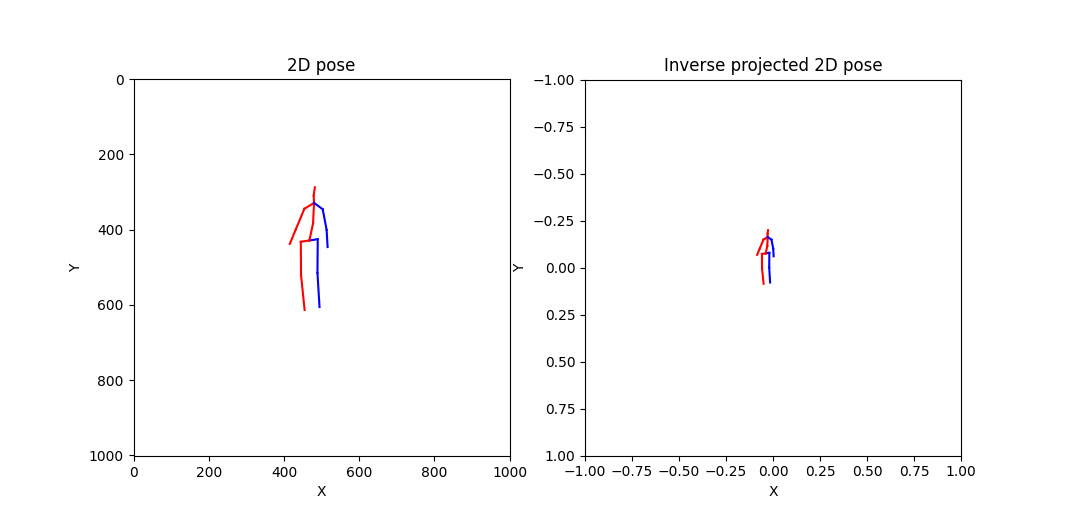

In [41]:
frame_num = 10
img_2d = img_2ds[subject][action][cam_id][frame_num]
img_2d_inverse_proj = img_2d.copy()
img_2d_inverse_proj[:, 0] = (img_2d_inverse_proj[:, 0] - cx) / fx
img_2d_inverse_proj[:, 1] = (img_2d_inverse_proj[:, 1] - cy) / fy

fig = plt.figure(0)
fig.clear()
ax = axes_2d(fig, loc=121, W=W, H=H)
ax2 = axes_2d(fig, loc=122, normalize=True)
ax.set_title('2D pose')
ax2.set_title('Inverse projected 2D pose')
draw_2d_pose(ax, img_2d, W=W, H=H)
draw_2d_pose(ax2, img_2d_inverse_proj, normalize=True)
plt.show()

In [44]:
img_2d = img_2ds[subject][action][cam_id]
img_2d_inverse_proj = img_2d.copy()
img_2d_inverse_proj[:, :, 0] = (img_2d_inverse_proj[:, :, 0] - cx) / fx
img_2d_inverse_proj[:, :, 1] = (img_2d_inverse_proj[:, :, 1] - cy) / fy

In [43]:
img_2d.shape

(17, 2)

In [47]:
save_folder = f'/home/{user}/codes/MotionBERT/videos/input/inverse_projection'
save_path = os.path.join(save_folder, f'inverse_projected_2d_pose_{subject}_{cam_id}_{action}.mp4')
videowriter = imageio.get_writer(save_path, fps=6)
for frame_num in tqdm(range(0, len(img_2d), 5)):
    clear_axes([ax, ax2])
    draw_2d_pose(ax, img_2d[frame_num], W=W, H=H)
    draw_2d_pose(ax2, img_2d_inverse_proj[frame_num], normalize=True)
    
    canvas = FigureCanvas(fig)
    canvas.draw()
    image_from_plot = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    image_from_plot = image_from_plot.reshape(canvas.get_width_height()[::-1] + (3,))
    videowriter.append_data(image_from_plot)
videowriter.close()

  0%|          | 0/288 [00:00<?, ?it/s]/tmp/ipykernel_104386/706139804.py:9: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image_from_plot = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2136, 1060) to (2144, 1072) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
100%|██████████| 288/288 [00:17<00:00, 16.36it/s]


In [49]:
random.shuffle(source_list)

In [52]:
save_folder = f'/home/{user}/codes/MotionBERT/videos/input/inverse_projection'

for source in source_list[:100]:
    subject, cam_id, action = split_source_name(source, dataset_name)
    save_path = os.path.join(save_folder, f'inverse_projected_2d_pose_{subject}_{cam_id}_{action}.mp4')
    if os.path.exists(save_path): continue
    
    
    img_2d = img_2ds[subject][action][cam_id]
    img_2d_inverse_proj = img_2d.copy()
    img_2d_inverse_proj[:, :, 0] = (img_2d_inverse_proj[:, :, 0] - cx) / fx
    img_2d_inverse_proj[:, :, 1] = (img_2d_inverse_proj[:, :, 1] - cy) / fy
    
    cam_param = cam_params[subject][action][cam_id]
    W, H, R, t, C, intrinsic, extrinsic = cam_param['W'], cam_param['H'], cam_param['R'], cam_param['t'], cam_param['C'], cam_param['intrinsic'], cam_param['extrinsic']
    fx, fy, cx, cy = intrinsic[0][0], intrinsic[1][1], intrinsic[0][2], intrinsic[1][2]
    
    videowriter = imageio.get_writer(save_path, fps=6)
    for frame_num in tqdm(range(0, len(img_2d), 5)):
        clear_axes([ax, ax2])
        draw_2d_pose(ax, img_2d[frame_num], W=W, H=H)
        draw_2d_pose(ax2, img_2d_inverse_proj[frame_num], normalize=True)
        
        canvas = FigureCanvas(fig)
        canvas.draw()
        image_from_plot = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
        image_from_plot = image_from_plot.reshape(canvas.get_width_height()[::-1] + (3,))
        videowriter.append_data(image_from_plot)
    videowriter.close()

  0%|          | 0/233 [00:00<?, ?it/s]/tmp/ipykernel_104386/3219355771.py:26: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image_from_plot = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2136, 1060) to (2144, 1072) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


 21%|██        | 49/233 [00:03<00:11, 15.71it/s]


KeyboardInterrupt: 